# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
import h5py
with h5py.File('/home/wenjing/Downloads/nyu_depth_v2_labeled.mat', 'r') as f:
    f.keys()
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[4]

    # Get the data
    data = list(f[a_group_key])

Keys: KeysView(<HDF5 file "nyu_depth_v2_labeled.mat" (mode r)>)


In [5]:
data=np.asarray(data)
# instance = data[0,:,:]

# # rgb_img = cv2.merge([instance])
# plt.imshow(instance)
# plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
# plt.show()
def store_many_disk(images, labels):
    """ Stores an array of images to disk
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Save all the images one by one
    for i, image in enumerate(images):
        Image.fromarray(image).save(disk_dir / f"{i}.png")

    # Save all the labels to the csv file
    with open(disk_dir / f"{num_images}.csv", "w") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        for label in labels:
            # This typically would be more than just one value per row
            writer.writerow([label])

(1449, 3, 640, 480)

In [19]:
# store image
with h5py.File('/home/wenjing/Downloads/nyu_depth_v2_labeled.mat', 'r') as f:
    f.keys()
    #print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[4]

    # Get the data
    data = list(f[a_group_key])
data=np.asarray(data)

for i in range(data.shape[0]):
    c1=data[i,0,:,:]
    c2=data[i,1,:,:]
    c3=data[i,2,:,:]

    rgb_img = cv2.merge([c1,c2,c3])
    Image.fromarray(rgb_img).save('/home/wenjing/Desktop/NYU/NYU_image' f"{i}.png")
# plt.imshow(rgb_img)
# plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
# plt.show()
    
    

In [21]:
#store depth
with h5py.File('/home/wenjing/Downloads/nyu_depth_v2_labeled.mat', 'r') as f:
    f.keys()
    #print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[3]

    # Get the data
    data = list(f[a_group_key])
data=np.asarray(data)
for i in range(data.shape[0]):
    gray_img=data[i,:,:]

    Image.fromarray(gray_img).save('/home/wenjing/Desktop/NYU/NYU_depth/depth' f"{i}.tiff")

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
import cv2

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo


ModuleNotFoundError: No module named 'maskrcnn_benchmark'

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [3]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [4]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

~~~~~~~~~~~~ ./last_checkpoint


Let's define a few helper functions for loading images from a URL

In [5]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

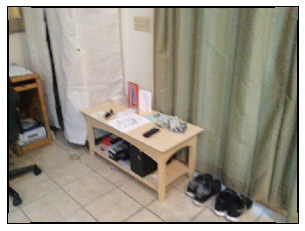

In [7]:
# from http://cocodataset.org/#explore?id=345434
#image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
#image = load("https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg")
#image = load("https://farm5.staticflickr.com/4033/4579630322_51f42c0231_z.jpg")
# data=np.asarray(data)
# c1=data[0,0,:,:]
# c2=data[0,1,:,:]
# c3=data[0,2,:,:]

#image = cv2.merge([c1,c2,c3])
# import matplotlib.pyplot as plt
#image = cv2.imread('/home/wenjing/Desktop/color/color_test/601.jpg')
# depth = cv2.imread('/home/wenjintg/Desktop/depth/depth_test/600.png')
#image = cv2.imread('/home/wenjing/Desktop/scans/scene0000_01/label-filt/0.png')

image = cv2.imread('/home/wenjing/Desktop/temporary/test/76.jpg')
imshow(image)


### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

[torch.Size([800, 1071])]


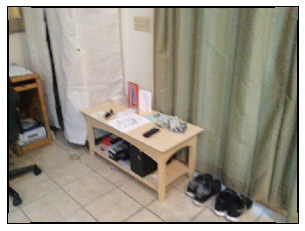

In [8]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [12]:
import torch

dictionary = torch.load("/home/wenjing/Desktop/temporary/no_last_layers.pth")

for key in dictionary["model"].keys():
    print(key)

mask_fcn1.bias
mask_fcn1.weight
mask_fcn2.bias
mask_fcn2.weight
mask_fcn3.bias
mask_fcn3.weight
mask_fcn4.bias
mask_fcn4.weight
conv1.bias
conv1.weight
conv5_mask.bias
conv5_mask.weight
rpn.head.conv.bias
rpn.head.conv.weight
fc1000.bias
fc1000.weight
fc6.bias
fc6.weight
fc7.bias
fc7.weight
fpn_inner1.bias
fpn_inner1.weight
fpn_inner2.bias
fpn_inner2.weight
fpn_inner3.bias
fpn_inner3.weight
fpn_inner4.bias
fpn_inner4.weight
fpn_layer1.bias
fpn_layer1.weight
fpn_layer2.bias
fpn_layer2.weight
fpn_layer3.bias
fpn_layer3.weight
fpn_layer4.bias
fpn_layer4.weight
mask_fcn_logits.bias
mask_fcn_logits.weight
layer1.0.downsample.0.bias
layer1.0.downsample.1.bias
layer1.0.downsample.1.weight
layer1.0.downsample.0.weight
layer1.0.conv1.bias
layer1.0.bn1.bias
layer1.0.bn1.weight
layer1.0.conv1.weight
layer1.0.conv2.bias
layer1.0.bn2.bias
layer1.0.bn2.weight
layer1.0.conv2.weight
layer1.0.conv3.bias
layer1.0.bn3.bias
layer1.0.bn3.weight
layer1.0.conv3.weight
layer1.1.conv1.bias
layer1.1.bn1.bias
la

## Keypoints Demo

In [1]:
# set up demo for keypoints
config_file = "../configs/caffe2/e2e_keypoint_rcnn_R_50_FPN_1x_caffe2.yaml"
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.merge_from_list(["MODEL.MASK_ON", False])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

NameError: name 'cfg' is not defined

In [12]:
# run demo
image = load("http://farm9.staticflickr.com/8419/8710147224_ff637cc4fc_z.jpg")
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

[torch.Size([800, 1199])]
5 [1, 256, 13, 19]


RuntimeError: size mismatch, m1: [1 x 63232], m2: [56576 x 221] at /opt/conda/conda-bld/pytorch_1570910687650/work/aten/src/TH/generic/THTensorMath.cpp:197

In [1]:
import json

In [8]:
with open('/home/wenjing/Desktop/scans/scene0000_01/scene0000_01_vh_clean.aggregation.json') as json_file:
    data = json.load(json_file)
    print(json.dumps(data, indent=4, sort_keys = True))
# Aggregated instance-level semantic annotations on lo-res, hi-res meshes, respectively



{
    "appId": "Aggregator.v2",
    "sceneId": "scannet.scene0000_01",
    "segGroups": [
        {
            "id": 0,
            "label": "scale",
            "objectId": 0,
            "segments": [
                59679
            ]
        },
        {
            "id": 1,
            "label": "laundry basket",
            "objectId": 1,
            "segments": [
                55645,
                46357,
                45355,
                56256
            ]
        },
        {
            "id": 2,
            "label": "toaster oven",
            "objectId": 2,
            "segments": [
                64567,
                64414,
                64474,
                65138,
                64779,
                65088
            ]
        },
        {
            "id": 3,
            "label": "guitar",
            "objectId": 3,
            "segments": [
                58976,
                58952,
                59589,
                60669,
                5982

In [4]:
person_dict = {"name": "Bob",
"languages": ["English", "Fench"],
"married": True,
"age": 32
}
with open('/home/wenjing/Desktop/jsonfile.txt', 'w') as json_file:
  json.dump(person_dict, json_file)

In [5]:
a = np.array([1,2,0])
b = np.array([0,1,1])
mask1 = a!=0
mask2 = b!=0
print(mask1*mask2)

[False  True False]
